# 1. Understanding The Data

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
dataset = pd.read_csv('.../bank-additional-full.csv', sep = ';')

In [262]:
print(dataset.shape)

(41188, 21)


In [263]:
print(dataset.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [264]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There are no null values in the dataset. On the other hand, there are some categorical variables.

# 2. Cleaning The Dataset

In [265]:
dataset = dataset.rename(columns={'y': 'subscribed'})

I will check duplicated values.

In [266]:
print(dataset.duplicated().sum())

12


There are 12 duplicated values in the dataset. Let's see which data points are duplicated.

In [267]:
print(dataset[dataset.duplicated(keep=False)].iloc[:,:7])

       age          job   marital            education  default housing loan
1265    39  blue-collar   married             basic.6y       no      no   no
1266    39  blue-collar   married             basic.6y       no      no   no
12260   36      retired   married              unknown       no      no   no
12261   36      retired   married              unknown       no      no   no
14155   27   technician    single  professional.course       no      no   no
14234   27   technician    single  professional.course       no      no   no
16819   47   technician  divorced          high.school       no     yes   no
16956   47   technician  divorced          high.school       no     yes   no
18464   32   technician    single  professional.course       no     yes   no
18465   32   technician    single  professional.course       no     yes   no
20072   55     services   married          high.school  unknown      no   no
20216   55     services   married          high.school  unknown      no   no

I will drop duplicated values from the dataset.

In [268]:
dataset = dataset.drop_duplicates()

In [269]:
print(dataset.shape)

(41176, 21)


In [270]:
print('\033[1mNULL VALUES\033[0m\n'+ str(dataset.isnull().values.any()))

NULL VALUES
False


There are no null values in the dataset.

# 3. Exploratory Data Analysis

There is a graphic below who subscribe a term deposit or not.

               no   yes
subscribed  36537  4639


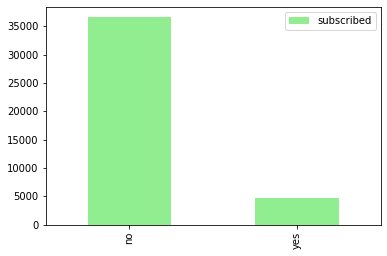

In [271]:
Subscribed = pd.DataFrame(dataset['subscribed'].value_counts())
print(Subscribed.T)
pd.DataFrame(dataset['subscribed'].value_counts()).plot(kind='bar', color='lightgreen')
plt.show()

Most people do not subscribe to a term deposit.

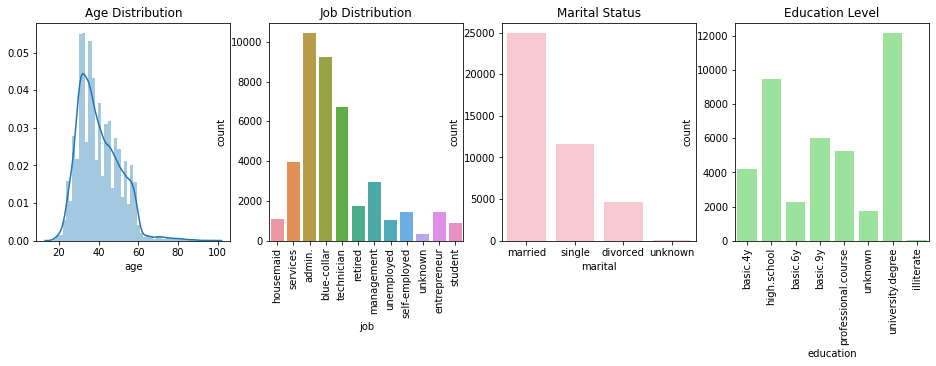

In [272]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
sns.distplot(dataset['age'])
plt.title('Age Distribution')

plt.subplot(1,4,2)
sns.countplot(dataset['job'])
plt.title('Job Distribution')
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.countplot(dataset['marital'], color='pink')
plt.title('Marital Status')

plt.subplot(1,4,4)
sns.countplot(dataset['education'], color='lightgreen')
plt.xticks(rotation=90)
plt.title('Education Level')

plt.show()

* Most people are generally between 20 - 40 years old. Few people are above 60 years old. 
* Most people are administrator, technician or blue-collar workers.
* Most people are married.
* Most people have university degree.

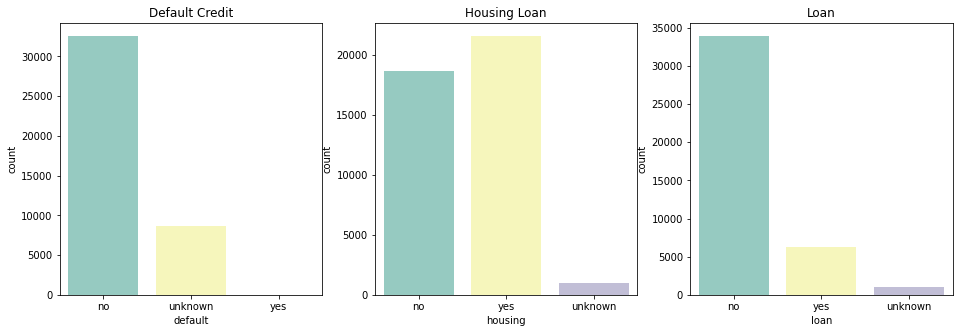

In [273]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.countplot(dataset['default'], palette="Set3")
plt.title('Default Credit')

plt.subplot(1,3,2)
sns.countplot(dataset['housing'], palette="Set3")
plt.title('Housing Loan')

plt.subplot(1,3,3)
sns.countplot(dataset['loan'], palette="Set3")
plt.title('Loan')

plt.show()

* Most people have no credit in default, while almost none of people have credit.
* The number of people who have housing loan are higher than people who have no housing loan.
* Most people have no personal loan. 

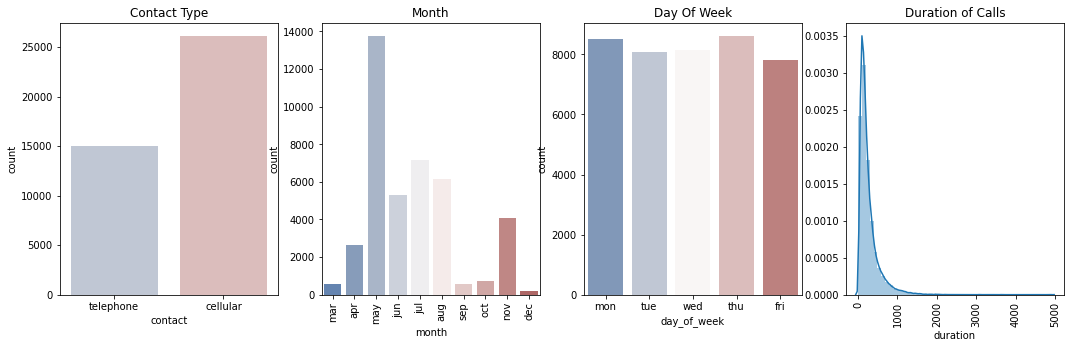

In [274]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.countplot(dataset['contact'], palette="vlag")
plt.title('Contact Type')

plt.subplot(1,4,2)
sns.countplot(dataset['month'], palette="vlag",order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Month')
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.countplot(dataset['day_of_week'], palette="vlag")
plt.title('Day Of Week')

plt.subplot(1,4,4)
sns.distplot(dataset['duration'])
plt.xticks(rotation=90)
plt.title('Duration of Calls')

plt.show()

* Customers were contacted almost everyday. It doesn't convey extra infrmation, that's why I will 'drop day_of_week' from the dataset.

* Most people are reached from cellular phones.
* In may, most calls are made.
* Duration of calls are generally between 0 - 1000 sn.

In [275]:
dataset.drop('day_of_week', axis=1, inplace=True)

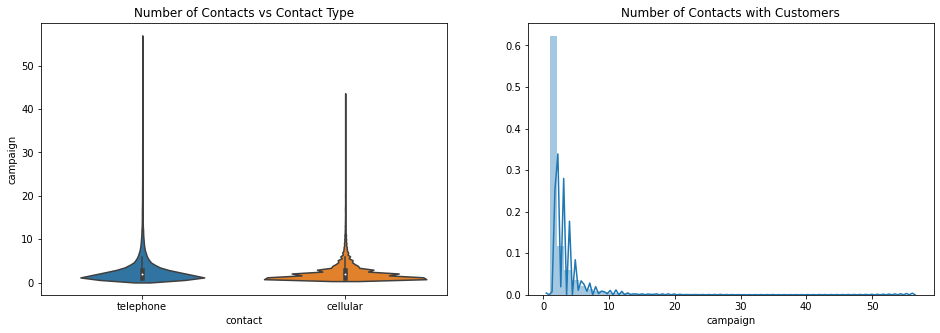

In [276]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.violinplot("contact", "campaign", data=dataset, kind='reg')
plt.title('Number of Contacts vs Contact Type')

plt.subplot(1,2,2)
sns.distplot(dataset['campaign'])
plt.title('Number of Contacts with Customers')

plt.show()

The number of contacts performed during this campaign and for this client are higher with telephone. On the other hand, the number of contacts is around 0-10 range.

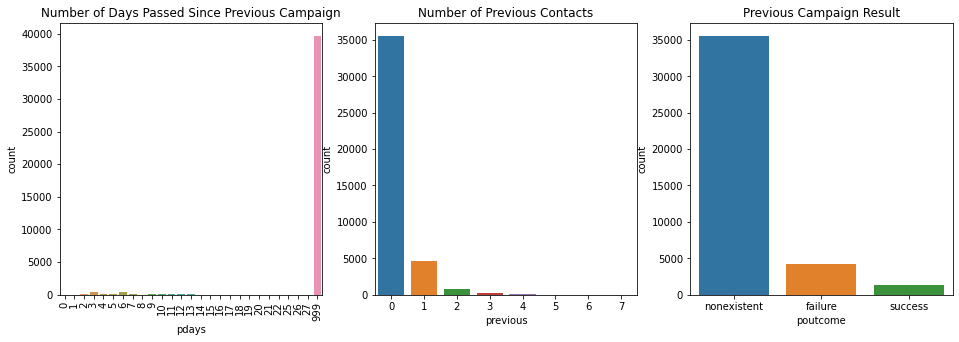

In [277]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.countplot(dataset['pdays'])
plt.xticks(rotation=90)
plt.title('Number of Days Passed Since Previous Campaign')

plt.subplot(1,3,2)
sns.countplot(dataset['previous'])
plt.title('Number of Previous Contacts')

plt.subplot(1,3,3)
sns.countplot(dataset['poutcome'])
plt.title('Previous Campaign Result')

plt.show()

* "pdays" show the number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted). Graphic tells us that almost all of the customers were not contacted for previous campaign. I will change this variable as previously contacted or not, since most of the clients were not previously contacted. 

* The number of previous contacts graphic shows that most people were not contacted previously. That's why previous campaign results do not exist for some customers.

In [278]:
dataset.loc[dataset['pdays'] < 999, 'pdays'] = 1
dataset.loc[dataset['pdays'] == 999, 'pdays'] = 0

In [279]:
dataset = dataset.rename(columns={'pdays': 'previouslycontacted', 'previous':'previouscontacts'})

# 4. Data Preparation

I will change ages as age group and I will drop age column from the dataset.

In [280]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
dataset.insert(1, 'agegroup', pd.cut(dataset['age'], bins=bins, labels=labels, right=False))
dataset = dataset.drop('age', axis=1)

### Converting to numerical values

I will convert categorical variables to numerical variables with Label Encoder from Sklearn.

In [281]:
categorical_columns = dataset.select_dtypes(include='object').columns

In [282]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_columns:
    dataset[i] = le.fit_transform(dataset[i]) 

In [283]:
print(dataset.head())

  agegroup  job  marital  education  default  housing  loan  contact  month  \
0        5    3        1          0        0        0     0        1      6   
1        5    7        1          3        1        0     0        1      6   
2        3    7        1          3        0        2     0        1      6   
3        4    0        1          1        0        0     0        1      6   
4        5    7        1          3        0        0     2        1      6   

   duration  campaign  previouslycontacted  previouscontacts  poutcome  \
0       261         1                    0                 0         1   
1       149         1                    0                 0         1   
2       226         1                    0                 0         1   
3       151         1                    0                 0         1   
4       307         1                    0                 0         1   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0     

In [284]:
print(dataset.shape)

(41176, 20)


### Checking Normal Distribution

Gaussian Naive Bayes assumes that the predictors take up a continuous value and are not discrete, and these values are sampled from a gaussian distribution. That's why I will check normal distribution.

In [285]:
X_train = dataset.iloc[:, :-1].values.astype('float')
y_train = dataset['subscribed'].values

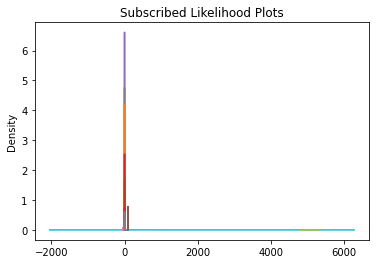

In [286]:
pd.DataFrame(X_train[y_train == 1]).plot(kind='density', ind=100, legend=False)
plt.title('Subscribed Likelihood Plots')

plt.show()

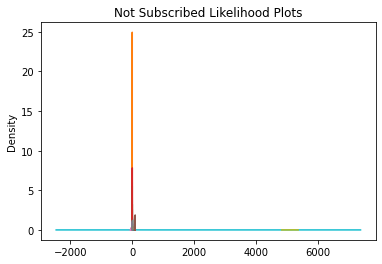

In [287]:
pd.DataFrame(X_train[y_train == 0]).plot(kind='density', ind=100, legend=False)
plt.title('Not Subscribed Likelihood Plots')

plt.show()

The data points are not normally distributed. I will apply Standard Scaler to get a more normally distributed dataset. 

In [288]:
from sklearn.preprocessing import StandardScaler
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))

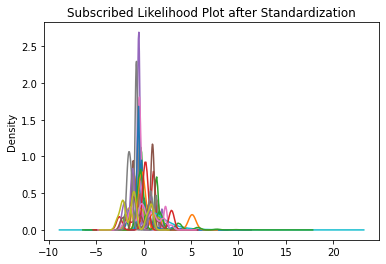

In [289]:
X_train[y_train == 1].plot(kind='density', ind=100, legend=False)
plt.title('Subscribed Likelihood Plot after Standardization')
plt.show()

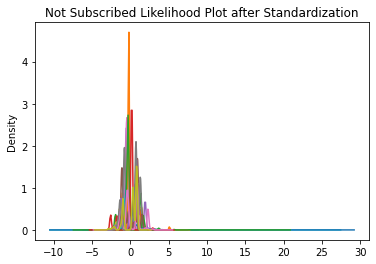

In [290]:
X_train[y_train == 0].plot(kind='density', ind=100, legend=False)
plt.title('Not Subscribed Likelihood Plot after Standardization')
plt.show()

There are values that go as 1,2,3 ... These values will not have perfectly normal distribution even after standardization.
However, it gives better distribution.

### Checking Correlation Between Features

The correlation between variables are not linear, that's why I will use spearman correlation method.

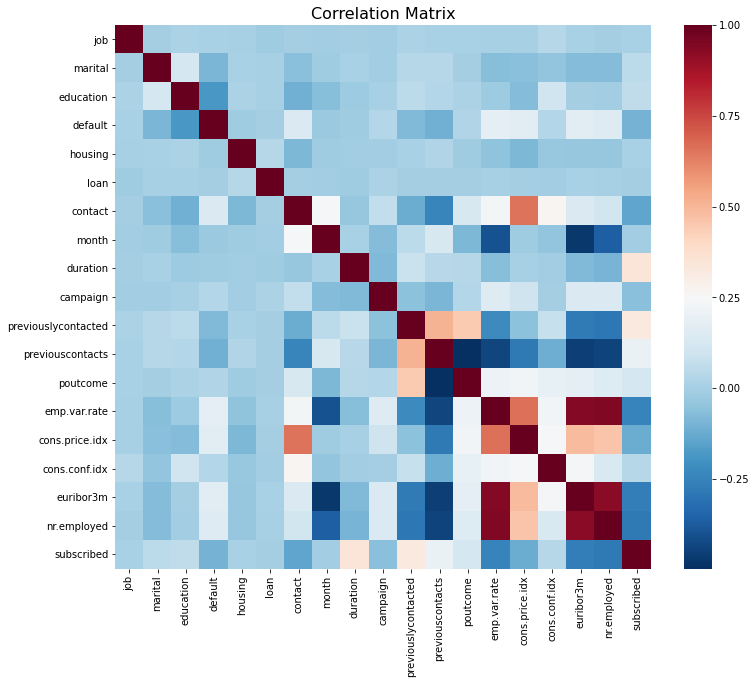

In [291]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(method='spearman'), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

There are some highly correlated variables in the dataset. Since Naive Bayes assumes that features are independent of each other, I will drop highly correlated varibles.

In [292]:
correlation = X_train.corr(method='spearman').abs()
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.40)]
X_train.drop(X_train[to_drop], axis=1, inplace=True)

In [293]:
print(X_train.shape)

(41176, 12)


# 5. Model

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

In [295]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
pred = gb.predict(pd.DataFrame(X_test))

# 6. Evaluation

0.8738459478626226


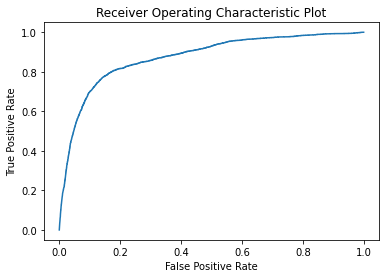

In [296]:
from sklearn.metrics import roc_curve, auc
gbprob = gb.predict_proba(X_train)[:,1]
fpr, tpr, thr = roc_curve(y_train, gbprob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
print(auc(fpr, tpr))

In [297]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score of Gaussian Naive Bayes:' + str(accuracy_score(y_test,pred)))
print('Confusion Matrix\n' + str(confusion_matrix(y_test, pred)))

Accuracy score of Gaussian Naive Bayes:0.8984845541091898
Confusion Matrix
[[8711  383]
 [ 662  538]]


The model predicted 383 false positives. It means it predicted as the 383 customers subscribe to a term deposit, but actually it is not true. These customers don't subscribe. This number is actually high. The model should not miss this, othervise they do not call the customer again, and lose the customer.